In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, plot_roc_curve, plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
df1 = pd.read_csv("training_set_features.csv")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [3]:
df2 = pd.read_csv("training_set_labels.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [4]:
df1['respondent_id'].equals(df2['respondent_id'])

True

In [5]:
df_join = pd.merge(df1, df2, on='respondent_id')

df_join

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [6]:
df_join.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [7]:
df_join = df_join.drop(labels=["employment_industry", "employment_occupation", "health_insurance"], axis=1).dropna()
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19642 non-null  int64  
 1   h1n1_concern                 19642 non-null  float64
 2   h1n1_knowledge               19642 non-null  float64
 3   behavioral_antiviral_meds    19642 non-null  float64
 4   behavioral_avoidance         19642 non-null  float64
 5   behavioral_face_mask         19642 non-null  float64
 6   behavioral_wash_hands        19642 non-null  float64
 7   behavioral_large_gatherings  19642 non-null  float64
 8   behavioral_outside_home      19642 non-null  float64
 9   behavioral_touch_face        19642 non-null  float64
 10  doctor_recc_h1n1             19642 non-null  float64
 11  doctor_recc_seasonal         19642 non-null  float64
 12  chronic_med_condition        19642 non-null  float64
 13  child_under_6_mo

In [8]:
df_num = df_join.select_dtypes(include=['int64', 'float64'])
df_obj = df_join.select_dtypes(include=['object'])

In [9]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19642 non-null  int64  
 1   h1n1_concern                 19642 non-null  float64
 2   h1n1_knowledge               19642 non-null  float64
 3   behavioral_antiviral_meds    19642 non-null  float64
 4   behavioral_avoidance         19642 non-null  float64
 5   behavioral_face_mask         19642 non-null  float64
 6   behavioral_wash_hands        19642 non-null  float64
 7   behavioral_large_gatherings  19642 non-null  float64
 8   behavioral_outside_home      19642 non-null  float64
 9   behavioral_touch_face        19642 non-null  float64
 10  doctor_recc_h1n1             19642 non-null  float64
 11  doctor_recc_seasonal         19642 non-null  float64
 12  chronic_med_condition        19642 non-null  float64
 13  child_under_6_mo

In [10]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age_group          19642 non-null  object
 1   education          19642 non-null  object
 2   race               19642 non-null  object
 3   sex                19642 non-null  object
 4   income_poverty     19642 non-null  object
 5   marital_status     19642 non-null  object
 6   rent_or_own        19642 non-null  object
 7   employment_status  19642 non-null  object
 8   hhs_geo_region     19642 non-null  object
 9   census_msa         19642 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


In [11]:
for obj in df_obj:
    print(df_obj[obj].value_counts())

65+ Years        4491
55 - 64 Years    4234
45 - 54 Years    4038
18 - 34 Years    3925
35 - 44 Years    2954
Name: age_group, dtype: int64
College Graduate    8165
Some College        5570
12 Years            4287
< 12 Years          1620
Name: education, dtype: int64
White                15745
Black                 1474
Hispanic              1295
Other or Multiple     1128
Name: race, dtype: int64
Female    11638
Male       8004
Name: sex, dtype: int64
<= $75,000, Above Poverty    11185
> $75,000                     6159
Below Poverty                 2298
Name: income_poverty, dtype: int64
Married        10768
Not Married     8874
Name: marital_status, dtype: int64
Own     14980
Rent     4662
Name: rent_or_own, dtype: int64
Employed              11093
Not in Labor Force     7417
Unemployed             1132
Name: employment_status, dtype: int64
lzgpxyit    3098
fpwskwrf    2328
qufhixun    2309
oxchjgsf    2171
bhuqouqj    2138
kbazzjca    2062
mlyzmhmf    1658
lrircsnp    1541
atmpey

In [12]:
oe = OrdinalEncoder()
ohe = OneHotEncoder()
df_obj_enc = df_obj.copy()

for obj in df_obj_enc:
    if len(obj) <= 2:
        df_obj_enc[obj] = ohe.fit_transform(df_obj_enc[[obj]])
    else:
        df_obj_enc[obj] = oe.fit_transform(df_obj_enc[[obj]])

In [14]:
for obj in df_obj_enc:
    print(df_obj_enc[obj].value_counts())

4.0    4491
3.0    4234
2.0    4038
0.0    3925
1.0    2954
Name: age_group, dtype: int64
2.0    8165
3.0    5570
0.0    4287
1.0    1620
Name: education, dtype: int64
3.0    15745
0.0     1474
1.0     1295
2.0     1128
Name: race, dtype: int64
0.0    11638
1.0     8004
Name: sex, dtype: int64
0.0    11185
1.0     6159
2.0     2298
Name: income_poverty, dtype: int64
0.0    10768
1.0     8874
Name: marital_status, dtype: int64
0.0    14980
1.0     4662
Name: rent_or_own, dtype: int64
0.0    11093
1.0     7417
2.0     1132
Name: employment_status, dtype: int64
6.0    3098
3.0    2328
9.0    2309
8.0    2171
1.0    2138
4.0    2062
7.0    1658
5.0    1541
0.0    1521
2.0     816
Name: hhs_geo_region, dtype: int64
0.0    8571
1.0    5717
2.0    5354
Name: census_msa, dtype: int64


In [25]:
df_final = pd.concat([df_num, df_obj_enc], axis = 1)

df_final = df_final.drop("respondent_id", axis = 1)

''

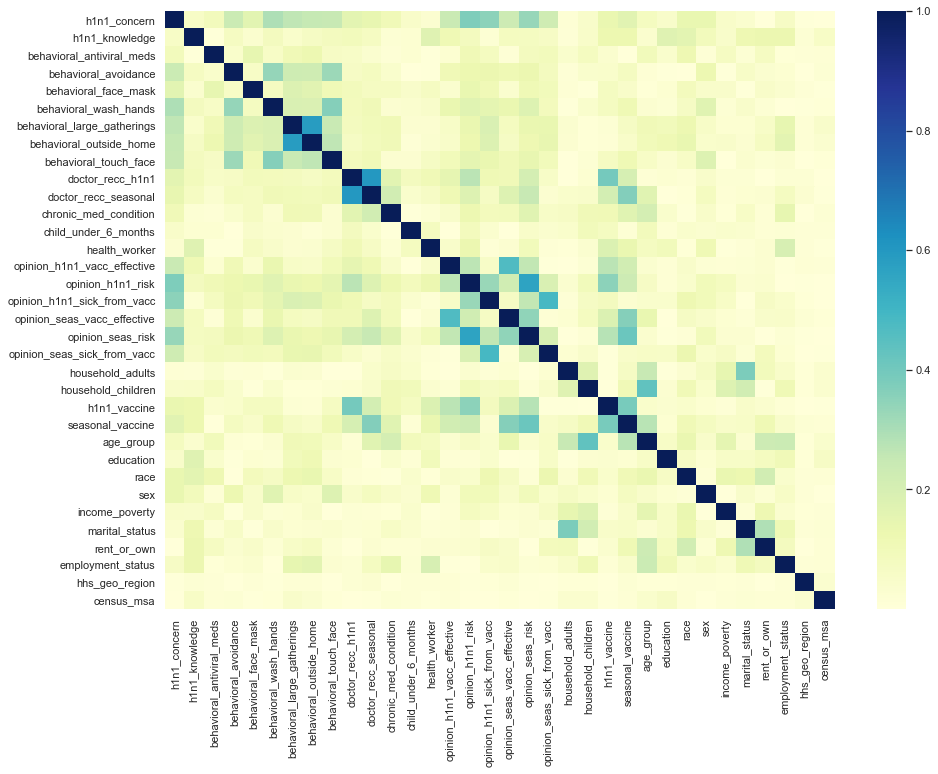

In [26]:
sns.set(rc={'figure.figsize':(15, 11)})
sns.heatmap(df_final.corr().abs(), cmap="YlGnBu")
;

In [17]:
X = df_final.copy().drop(columns='seasonal_vaccine')
y = df_final['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [27]:
y_pred = tree.predict(X_test)

prec = precision_score(y_test, y_pred) * 100
print("Precision: {0}".format(prec))

Precision: 69.90672557682866


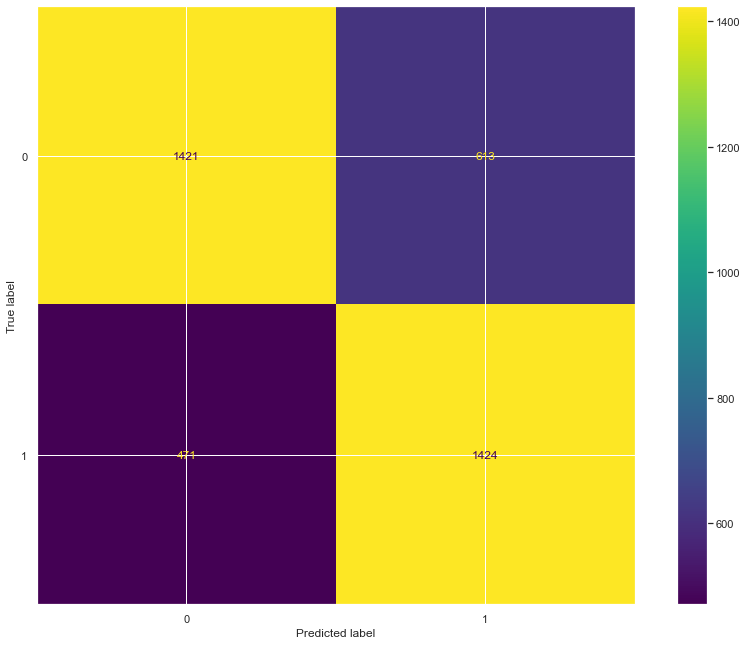

In [24]:
plot_confusion_matrix(tree, X_test, y_test);

In [28]:
pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('std_scaler', StandardScaler()),
        ('rf_clf', DecisionTreeClassifier(random_state=42)),
])


# Train the pipeline (tranformations & predictor)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('rf_clf', DecisionTreeClassifier(random_state=42))])

In [31]:
model_pipe = Pipeline(steps=[('rf', DecisionTreeClassifier())])

In [33]:
gs_pipe = GridSearchCV(estimator=model_pipe, param_grid=[])